In [2]:
import matplotlib.pyplot as plt
from matplotlib.backend_bases import RendererBase
from scipy import signal
from scipy.io import wavfile
#import soundfile as sf
import os
import numpy as np
from PIL import Image
from scipy.fftpack import fft

%matplotlib inline

In [35]:
audio_path = 'data/train/audio/'
pict_Path = 'data/picts/train_128_imsave/'
test_pict_Path = 'data/picts/test_128_imsave/'
test_audio_path = 'data/test/audio/'
samples = []

In [4]:
subFolderList = []
for x in os.listdir(audio_path):
    if os.path.isdir(audio_path + '/' + x):
        subFolderList.append(x)

In [5]:
sample_audio = []
total = 0
for x in subFolderList:
    
    # get all the wave files
    all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
    total += len(all_files)
    # collect the first file from each dir
    sample_audio.append(audio_path  + x + '/'+ all_files[0])
    
    # show file counts
    print('count: %d : %s' % (len(all_files), x ))

    if not os.path.exists(pict_Path + '/' + x):
        os.makedirs(pict_Path + '/' + x)
    
print(total)

count: 1733 : tree
count: 2357 : five
count: 1746 : dog
count: 1742 : happy
count: 2372 : go
count: 2367 : right
count: 402 : _background_noise_
count: 1746 : marvin
count: 2375 : no
count: 2352 : eight
count: 2370 : one
count: 1713 : bed
count: 1731 : bird
count: 2364 : nine
count: 1745 : wow
count: 2373 : two
count: 2367 : on
count: 2380 : stop
count: 1750 : house
count: 2353 : left
count: 2377 : seven
count: 2356 : three
count: 1734 : sheila
count: 2376 : zero
count: 1733 : cat
count: 2372 : four
count: 2357 : off
count: 2377 : yes
count: 2359 : down
count: 2375 : up
count: 2369 : six
65123


In [6]:
sample_audio[0]

'data/train/audio/tree/09ddc105_nohash_0.wav'

In [7]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, np.log(spec.T.astype(np.float32) + eps)

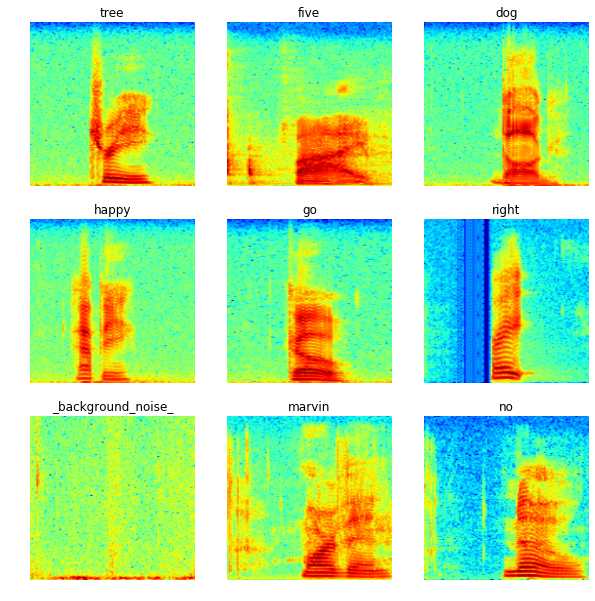

In [8]:
fig = plt.figure(figsize=(10,10))

# for each of the samples
for i, filepath in enumerate(sample_audio[:9]):
    # Make subplots
    plt.subplot(3,3,i+1)
    
    # pull the labels
    label = filepath.split('/')[-2]
    plt.title(label)
    
    # create spectogram
    samplerate, test_sound  = wavfile.read(filepath)
    _, spectrogram = log_specgram(test_sound, samplerate)
    
    plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.axis('off')

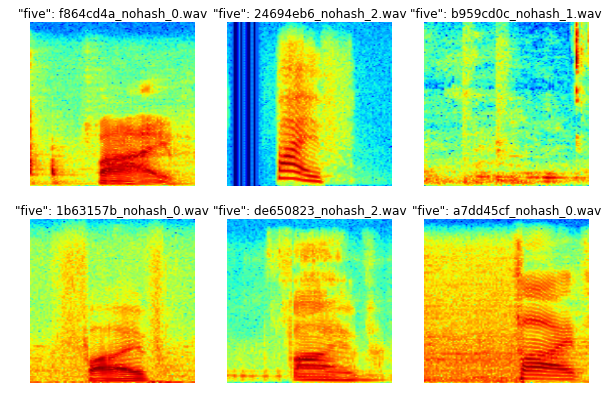

In [9]:
five_samples = [audio_path + 'five/' + y for y in os.listdir(audio_path + 'five/')[:6]]

fig = plt.figure(figsize=(10,10))

for i, filepath in enumerate(five_samples):
    # Make subplots
    plt.subplot(3,3,i+1)
    
    # pull the labels
    label = filepath.split('/')[-1]
    plt.title('"five": '+label)
    
    # create spectogram
    # create spectogram
    samplerate, test_sound  = wavfile.read(filepath)
    _, spectrogram = log_specgram(test_sound, samplerate)
    
    plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.axis('off')

In [10]:
# def wav2img(wav_path, targetdir='', figsize=(4,4)):
#     """
#     takes in wave file path
#     and the fig size. Default 4,4 will make images 288 x 288
#     """

#     fig = plt.figure(figsize=figsize)    
#     # use soundfile library to read in the wave files
#     samplerate, test_sound  = wavfile.read(wav_path)
#     _, spectrogram = log_specgram(test_sound, samplerate)
    
#     ## create output path
#     output_file = wav_path.split('/')[-1].split('.wav')[0]
#     output_file = targetdir +'/'+ output_file
#     #plt.imshow(spectrogram.T, aspect='auto', origin='lower')
#     plt.imsave('%s.jpg' % output_file, spectrogram)
#     plt.close()

In [18]:
####### Fastest ##########
from scipy.misc import imrotate
from scipy.misc import imresize
plt.ioff()
def wav2img(wav_path, targetdir='', figsize=(4,4)):
    """
    takes in wave file path
    and the fig size. Default 4,4 will make images 288 x 288
    """

#     fig = plt.figure(figsize=figsize)    
    # use soundfile library to read in the wave files
    samplerate, test_sound  = wavfile.read(wav_path)
    _, spectrogram = log_specgram(test_sound, samplerate)
    spectrogram = imrotate(imresize(spectrogram, (128, 128)), -90)
    
    ## create output path
    output_file = wav_path.split('/')[-1].split('.wav')[0]
    output_file = targetdir +'/'+ output_file
    #plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.imsave('%s.jpg' % output_file, spectrogram)
#     plt.close()

In [76]:
# ####### Split background noise
# #### ffmpeg -i dude_miaowing.wav -f segment -segment_time 1 -c copy dude_miaowing%01d.wav
# # all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
# import ntpath
# import sys
# from time import sleep

# os.chdir('/home/harrisonfsmith95/machine_learning/speech/')
# x = '_background_noise_'
# print(i, ':', x)
# # get all the wave files
# all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
# files = [f[:-4] for f in all_files if ntpath.basename(f)]
# print(files)
# os.chdir(str(os.getcwd()+'/'+audio_path+'/'+x))
# for idx, file in enumerate(all_files):
#     command = 'ffmpeg -i {} -f segment -segment_time {} -c copy {}%01d.wav'.format(file, 1, files[idx])
#     command2 = 'rm {}'.format(file)
# #     print(command, command2)
#     os.system(command)
#     sleep(3)
#     os.system(command2)

# print(os.getcwd())
# os.chdir('/home/harrisonfsmith95/machine_learning/speech/')

In [25]:
import sys
def print_progress(count, total):
    # Percentage completion.
    pct_complete = float(count) / total

    # Status-message.
    # Note the \r which means the line should overwrite itself.
    msg = "\r- Progress: {0:.1%}".format(pct_complete)

    # Print it.
    sys.stdout.write(msg)
    sys.stdout.flush()

In [77]:
# # Already converted
# for i, x in enumerate(subFolderList):#[:3]):
#     print(i, ':', x)
#     # get all the wave files
#     all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
#     total = len(all_files)
#     for count, file in enumerate(all_files):
#         wav2img(audio_path + x + '/' + file, pict_Path + x)
#         print_progress(count, total)

0 : tree
1 : five
2 : dog
3 : happy
4 : go
5 : right
6 : _background_noise_
7 : marvin
8 : no
9 : eight
10 : one
11 : bed
12 : bird
13 : nine
14 : wow
15 : two
16 : on
17 : stop
18 : house
19 : left
20 : seven
21 : three
22 : sheila
23 : zero
24 : cat
25 : four
26 : off
27 : yes
28 : down
29 : up
30 : six


In [ ]:
# Already converted
# get all the wave files
if not os.path.exists(test_pict_Path):
    os.makedirs(test_pict_Path)

    all_files = [y for y in os.listdir(test_audio_path) if '.wav' in y]
#     all_files = all_files[0:300]
    total = len(all_files)
    for count, file in enumerate(all_files):###############################CHANGED FOR SMALLER SET
        wav2img(test_audio_path + '/' + file, test_pict_Path)
        print_progress(count, total)

- Progress: 0.0%

/home/harrisonfsmith95/anaconda3/lib/python3.5/site-packages/scipy/misc/pilutil.py:479: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/home/harrisonfsmith95/anaconda3/lib/python3.5/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


- Progress: 31.4%